The first assignment is to answer some basic questions about a sample of the "NYC Taxi Dataset". The URLs were taken from https://github.com/toddwschneider/nyc-taxi-data/.
 
Notice that, even though we will use only a subset, this needs around 2 GB of RAM, plus a margin to do the analysis! if your computer is not capable enough, you can use https://colab.research.google.com/, which gives you a Jupyter installation with 12 GB of RAM for free.
 
1. Load https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2017-10.csv into pandas, using an appropriate column as an index and parsing the columns that have dates
2. Display the first 5 rows, a statistical summary, and the dtypes of the columns
3. Do you find any inconsistency in fares or distance data? If so, remove them from the dataset
4. Try to plot a histogram of the trip distance distribution. What happens? Try increasing the number of bins, normalizing the data, or using a logarithmic scale in the Y axis to actually see something
5. What is the median trip distance per passenger count? Represent it in text and graphical form
6. Create a new column payment_type_text that is 'Cash' if payment_type is 2 and 'Other' otherwise
7. Bonus points: what is the correlation between leaving no tip and paying with cash?
 
The grading will be as follows: 0.5 points for each correct answer above, and 1 extra point for overall presentation, aesthetics, code quality and originality. Yes: the maximum theoretical grade is thus 4.5 out of 4, but only 4 points will be awarded.
 
The format of the delivery *must* be a Jupyter notebook that should run, top to bottom, without errors on a capable computer with Python 3.6. It should include explanations in the form of text cells, and code comments where appropriate.

**1. Load https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2017-10.csv into pandas, using an appropriate column as an index and parsing the columns that have dates**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [0]:
df = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2017-10.csv')

In [0]:
#parsing pickup and dropoff datetimes and converting to datetime formats
#default indexing used, as vendor ID does not make an appropriate index

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format= '%Y/%m/%d %H:%M:%S')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format= '%Y/%m/%d %H:%M:%S')
#df.head()

**2. Display the first 5 rows, a statistical summary, and the dtypes of the columns**


In [4]:
#display the first 5 rows
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-10-01 00:01:50,2017-10-01 00:14:13,1,2.00,1,N,142,233,2,10.0,0.5,0.5,0.00,0.0,0.3,11.30
1,1,2017-10-01 00:02:43,2017-10-01 00:08:35,2,2.30,1,N,142,166,1,8.0,0.5,0.5,1.85,0.0,0.3,11.15
2,1,2017-10-01 00:12:08,2017-10-01 00:25:49,3,2.80,1,N,151,262,1,13.0,0.5,0.5,1.72,0.0,0.3,16.02
3,2,2017-10-01 00:00:25,2017-10-01 00:11:24,1,1.97,1,N,100,229,1,9.5,0.5,0.5,1.00,0.0,0.3,11.80
4,2,2017-10-01 00:15:30,2017-10-01 00:25:11,1,2.17,1,N,141,142,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36


In [5]:
#how many rows?
df.shape

(9768815, 17)

In [6]:
#display a statistical summary
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06
mean,1.549415e+00,1.617468e+00,2.964095e+00,1.045011e+00,1.630937e+02,1.612835e+02,1.328251e+00,1.338078e+01,3.300792e-01,4.972671e-01,1.883138e+00,3.479925e-01,2.996095e-01,1.674133e+01
std,4.975522e-01,1.259104e+00,3.814063e+00,4.748632e-01,6.624797e+01,7.015271e+01,4.901289e-01,3.078552e+02,4.644125e-01,1.177005e-01,2.634506e+00,1.696558e+00,1.438805e-02,3.079748e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.600000e+02,-5.800000e+01,-5.000000e-01,-4.100000e+01,-1.500000e+01,-3.000000e-01,-4.603000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,1.120000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.760000e+00
50%,2.000000e+00,1.000000e+00,1.650000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.225000e+01
75%,2.000000e+00,2.000000e+00,3.070000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01,1.830000e+01
max,2.000000e+00,9.000000e+00,1.178600e+03,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,8.616024e+05,9.600000e+01,2.500000e+02,4.445000e+02,9.296500e+02,1.000000e+00,8.616032e+05


In [7]:
#display the dtypes of the columns
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

**3. Do you find any inconsistency in fares or distance data? If so, remove them from the dataset**

In [0]:
#the above .describe() shows negative values for fare_amount, and 0 values for trip_distance 
#to remove negative/0 values:

df = df[(df['fare_amount']>0) & (df['trip_distance']>0)]

In [9]:
#how many rows now?
df.shape

(9698454, 17)

In [10]:
9768815 - 9698454

70361

In [0]:
#we now have 70,361 fewer rows in the dataframe

**4. Try to plot a histogram of the trip distance distribution. What happens? Try increasing the number of bins, normalizing the data, or using a logarithmic scale in the Y axis to actually see something**

(array([9.698435e+06, 1.600000e+01, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e-02, 1.178690e+02, 2.357280e+02, 3.535870e+02,
        4.714460e+02, 5.893050e+02, 7.071640e+02, 8.250230e+02,
        9.428820e+02, 1.060741e+03, 1.178600e+03]),
 <a list of 10 Patch objects>)

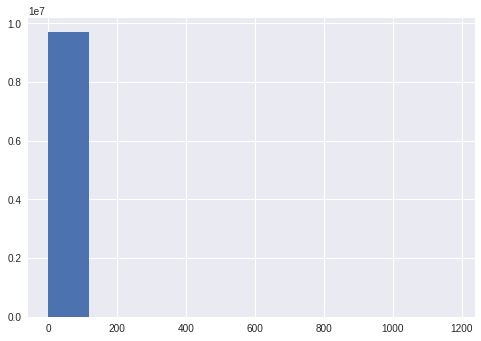

In [12]:
#First attempt at plotting histogram with no adjustments/arguments

plt.hist(df['trip_distance'])

Text(0.5,1,'NYC Taxi trip distances (logarithmic)')

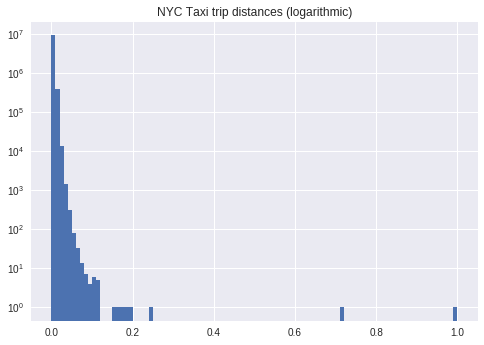

In [27]:
#Re-plotted using 100 bins, normalized data and logarithmic y-scale

df_norm = (df['trip_distance'] - df['trip_distance'].min()) / (df['trip_distance'].max() - df['trip_distance'].min())

plt.hist(df_norm, bins = 100, log = True)
plt.title('NYC Taxi trip distances (logarithmic)')


**5. What is the median trip distance per passenger count? Represent it in text and graphical form.**

In [14]:
#groupby passengercount, and then calculate median of trip_distance within each group

passengercount = df.groupby(['passenger_count'], as_index=False)['trip_distance'].median()

passengercount

,passenger_count,trip_distance
0,0,1.60
1,1,1.62
2,2,1.71
3,3,1.70
4,4,1.77
5,5,1.70
6,6,1.68
7,7,9.73
8,8,4.50
9,9,12.55


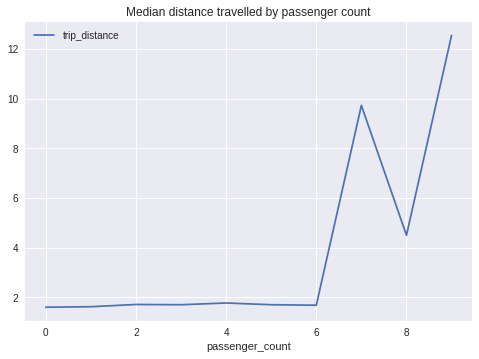

In [15]:
#showing median values in graphical format

passengercount.plot(x = 'passenger_count', y = 'trip_distance')
plt.title('Median distance travelled by passenger count')

plt.show()

In [0]:
#The above data shows that there is little to no relationship between these variables when passenger number is 0-6. 
#There seems to be a positive (but not totally linear) correlation above 6 passengers

**6. Create a new column payment_type_text that is 'Cash' if payment_type is 2 and 'Other' otherwise.**

In [17]:
df["payment_type_text"] = np.where(df.eval('payment_type == 2'), "Cash", "Other")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type_text
0,1,2017-10-01 00:01:50,2017-10-01 00:14:13,1,2.00,1,N,142,233,2,10.0,0.5,0.5,0.00,0.0,0.3,11.30,Cash
1,1,2017-10-01 00:02:43,2017-10-01 00:08:35,2,2.30,1,N,142,166,1,8.0,0.5,0.5,1.85,0.0,0.3,11.15,Other
2,1,2017-10-01 00:12:08,2017-10-01 00:25:49,3,2.80,1,N,151,262,1,13.0,0.5,0.5,1.72,0.0,0.3,16.02,Other
3,2,2017-10-01 00:00:25,2017-10-01 00:11:24,1,1.97,1,N,100,229,1,9.5,0.5,0.5,1.00,0.0,0.3,11.80,Other
4,2,2017-10-01 00:15:30,2017-10-01 00:25:11,1,2.17,1,N,141,142,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,Other


**7. Bonus points: what is the correlation between leaving no tip and paying with cash?**

In [18]:
#Correlations between two binary variables (cash v. not cash & tip v. no tip) feel wrong for me
#I instead cross-tabbed these two columns to look at incidence
#First step is to create a new column distilling tip amount into binary variables (tip v. no_tip )

df["tip_binary"] = np.where(df.eval('tip_amount == 0'), "no_tip", "tip")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type_text,tip_binary
0,1,2017-10-01 00:01:50,2017-10-01 00:14:13,1,2.00,1,N,142,233,2,10.0,0.5,0.5,0.00,0.0,0.3,11.30,Cash,no_tip
1,1,2017-10-01 00:02:43,2017-10-01 00:08:35,2,2.30,1,N,142,166,1,8.0,0.5,0.5,1.85,0.0,0.3,11.15,Other,tip
2,1,2017-10-01 00:12:08,2017-10-01 00:25:49,3,2.80,1,N,151,262,1,13.0,0.5,0.5,1.72,0.0,0.3,16.02,Other,tip
3,2,2017-10-01 00:00:25,2017-10-01 00:11:24,1,1.97,1,N,100,229,1,9.5,0.5,0.5,1.00,0.0,0.3,11.80,Other,tip
4,2,2017-10-01 00:15:30,2017-10-01 00:25:11,1,2.17,1,N,141,142,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,Other,tip


In [19]:
#groupby payment type, and then tip 

df.groupby(['payment_type_text', 'tip_binary']).size() / len(df)

payment_type_text  tip_binary
Cash               no_tip        3.123914e-01
                   tip           4.124369e-07
Other              no_tip        3.489752e-02
                   tip           6.527106e-01
dtype: float64

In [22]:
_19.unstack()

tip_binary,no_tip,tip
payment_type_text,,
Cash,0.312391,4.124369e-07
Other,0.034898,6.527106e-01


In [23]:
#checking the workings

_19.sum()

1.0

In [24]:
df.loc[df['tip_binary'] == 'no_tip', 'payment_type_text'].value_counts(normalize=True)

Cash     0.899514
Other    0.100486
Name: payment_type_text, dtype: float64

In [0]:
#The above shows that for people who gave no tip, 90% paid with cash, and 10% used another payment type

In [25]:
df.loc[df['tip_binary'] == 'tip', 'payment_type_text'].value_counts(normalize=True)

Other    9.999994e-01
Cash     6.318828e-07
Name: payment_type_text, dtype: float64

In [0]:
#The above shows that for people who gave a tip, 100% did NOT pay with cash
#There is a very strong negative relationship between leaving no tip and paying cash

#This is not saying that passengers don't leave tips if they pay cash, it's rather saying that drivers don't record tips if it is in cash